In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

## Loading dataset

In [3]:
from saltsegm.dataset import Dataset

In [4]:
PREP_DATA_PATH = '/cobrain/groups/ml_group/data/dustpelt/salt_prep/train/'

In [7]:
ds = Dataset(PREP_DATA_PATH)

ids = ds.ids
metadata = ds.metadata

load_x = ds.load_x
load_y = ds.load_y

## Take a look at the random images

In [8]:
ids_to_show = [5,6,7,8]

xs, ys, zs = [], [], []
for _id in ids_to_show:
    xs.append(load_x(_id)[0])
    ys.append(load_y(_id)[0])
    zs.append(metadata.iloc[_id]['z'])

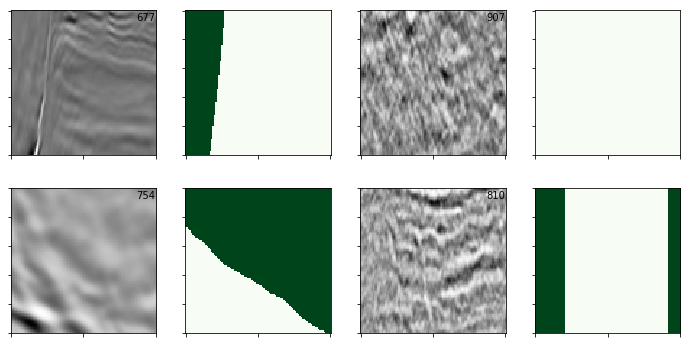

In [16]:
cols = 4
rows = 2

fig, axs = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))

for i, (x, y, z) in enumerate(zip(xs, ys, zs)):
    ax_x = axs[int(2 * i / cols), 2 * i % cols]
    ax_y = axs[int(2 * i / cols), 2 * i % cols + 1]
    
    ax_x.imshow(x, cmap='Greys')
    ax_x.text(x.shape[0] - 1, 1, round(z, 2), color="black", ha="right", va="top")
    ax_y.imshow(y, cmap='Greens')
    
    ax_x.set_yticklabels([])
    ax_x.set_xticklabels([])
    ax_y.set_yticklabels([])
    ax_y.set_xticklabels([])
    
plt.show()

`visual type of image depends on the depth ?`

* TODO: sort by depths and look via slider
* TODO: different models for different depths

## Some general statistics

In [28]:
n_imgs = len(metadata['target_ratio'].values)
n_empty_imgs = len(metadata['target_ratio'].values[metadata['target_ratio'].values == 0])

print('Ratio of empty images is {}'.format(n_empty_imgs / n_imgs))
print('Total number of images: {}'.format(n_imgs))
print('Empty: {}'.format(n_empty_imgs))

Ratio of empty images is 0.3905
Total number of images: 4000
Empty: 1562


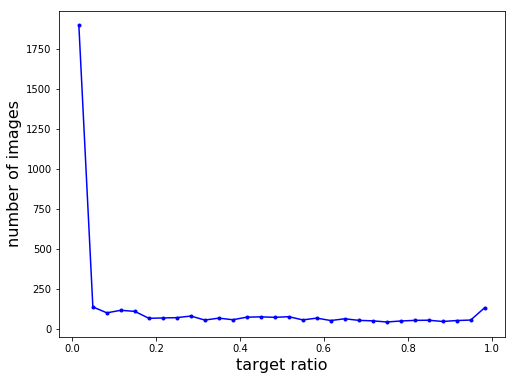

In [36]:
ratio_values, x_edges = np.histogram(metadata['target_ratio'].values, bins=30)

x_values = []
for i in range(len(x_edges) - 1):
    x_values.append( (x_edges[i] + x_edges[i+1]) / 2 )

plt.figure(figsize=(8,6))

plt.plot(x_values, ratio_values, 'b-')
plt.plot(x_values, ratio_values, 'b.')

plt.xlabel('target ratio', fontsize=16)
plt.ylabel('number of images', fontsize=16)

plt.show()

`TODO: classify empty images with almost 100% recall.`

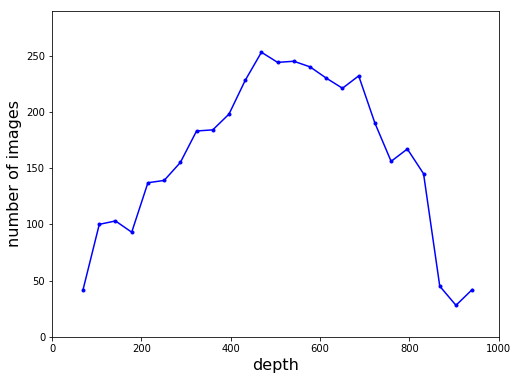

In [38]:
ratio_values, x_edges = np.histogram(metadata['z'].values, bins=25)

x_values = []
for i in range(len(x_edges) - 1):
    x_values.append( (x_edges[i] + x_edges[i+1]) / 2 )

plt.figure(figsize=(8,6))

plt.plot(x_values, ratio_values, 'b-')
plt.plot(x_values, ratio_values, 'b.')

plt.xlabel('depth', fontsize=16)
plt.ylabel('number of images', fontsize=16)

plt.xlim((0, 1000))
plt.ylim((0, 290))

plt.show()